In [1]:
import pandas as pd
import os
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
from scipy import stats
import numpy as np
from scipy.stats import skew, boxcox

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
warnings.filterwarnings('ignore')
dir = "../data"

In [3]:
train_data = pd.read_csv(os.path.join(dir, "train.csv"))
train_data.shape
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [4]:
def cont_selector(df):
    return df.select_dtypes(include=['number']).columns

def cat_selector(df):
    return df.select_dtypes(exclude=['number']).columns

def cast_to_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')

In [5]:
features_to_cast = ["no_of_adults", "no_of_children", "no_of_week_nights","no_of_weekend_nights",
                   "type_of_meal_plan", "required_car_parking_space","room_type_reserved",
                   "market_segment_type","repeated_guest","no_of_special_requests", "arrival_month",
                   "arrival_date","booking_status", "arrival_year"]
features_to_cast.extend(cat_selector(train_data))
cast_to_cat(train_data, features_to_cast)
print(cont_selector(train_data))
print(cat_selector(train_data))

Index(['id', 'lead_time', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room'],
      dtype='object')
Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'no_of_special_requests',
       'booking_status'],
      dtype='object')


In [6]:
print(cont_selector(train_data))
print(cat_selector(train_data))

Index(['id', 'lead_time', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room'],
      dtype='object')
Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'no_of_special_requests',
       'booking_status'],
      dtype='object')


In [7]:
def plot_missing_data(df):
    counts = df.isnull().sum()
    per = counts/float(df.shape[0])
    df_missing = pd.DataFrame({'feature':counts.index, 'MissingValuePercent':per})
    df_missing.sort_values(by=['MissingValuePercent'], ascending=True, inplace=True)
    df_missing.set_index('feature', inplace=True)
    df_missing.plot(kind='barh', figsize=(25, 25))

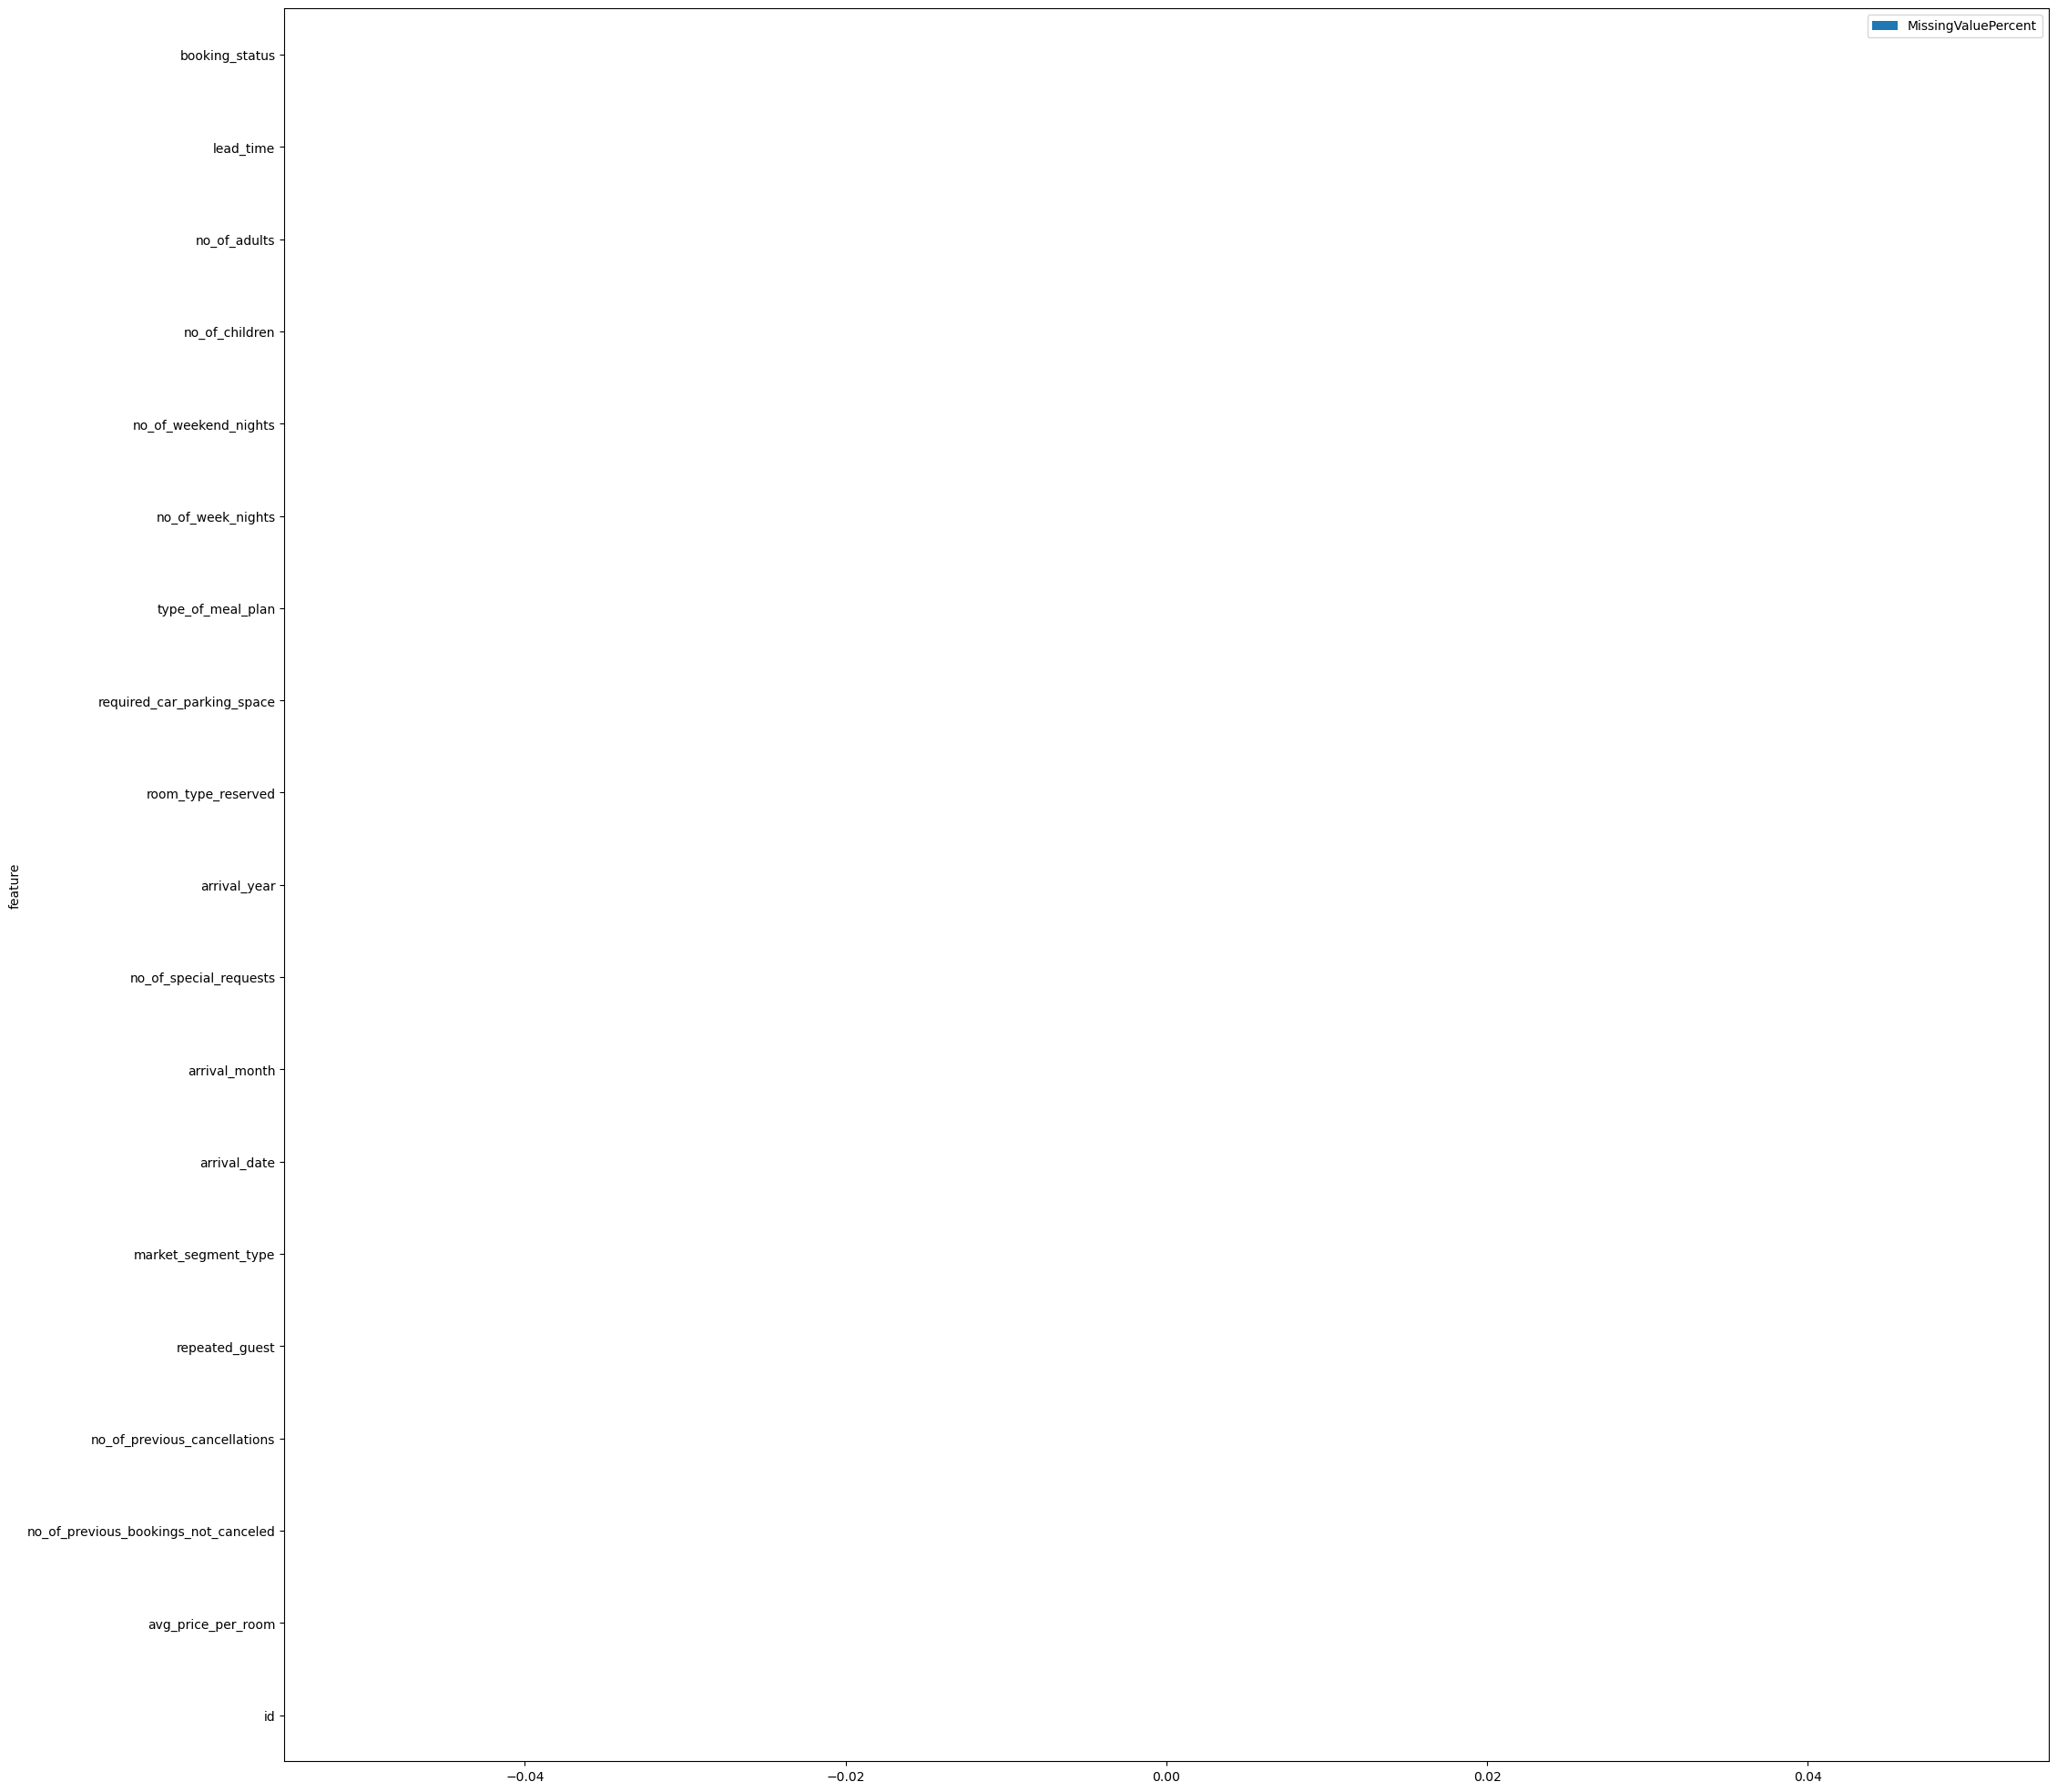

In [8]:
plot_missing_data(train_data)

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'no_of_special_requests',
       'booking_status'],
      dtype='object')


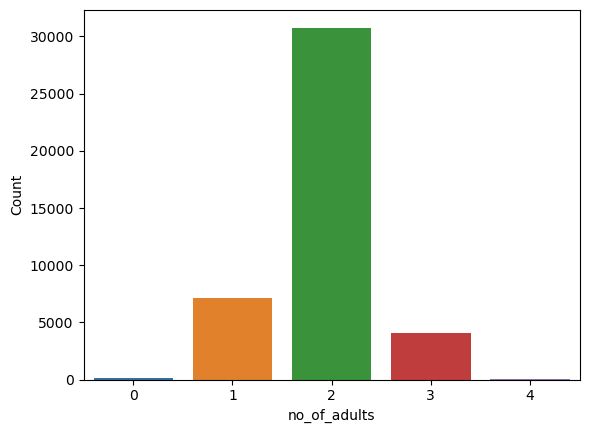

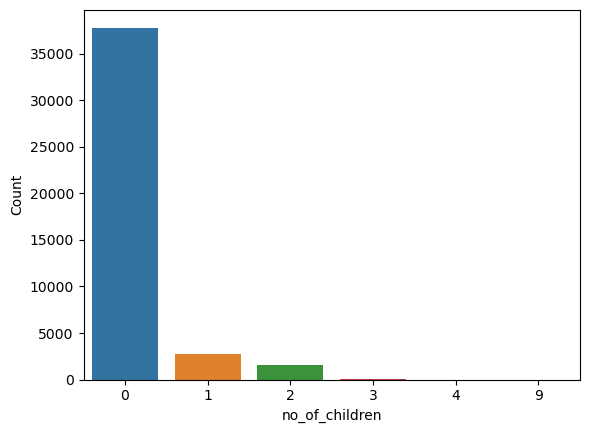

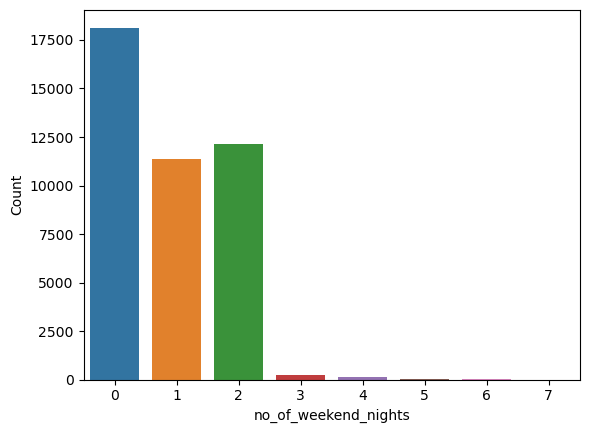

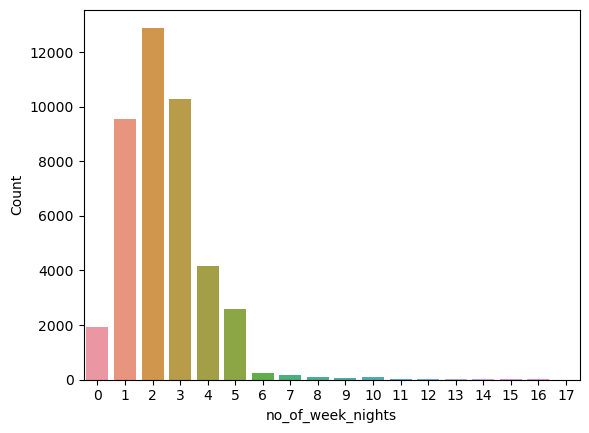

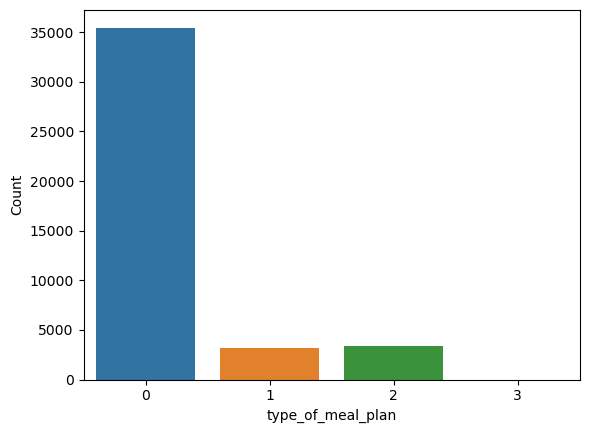

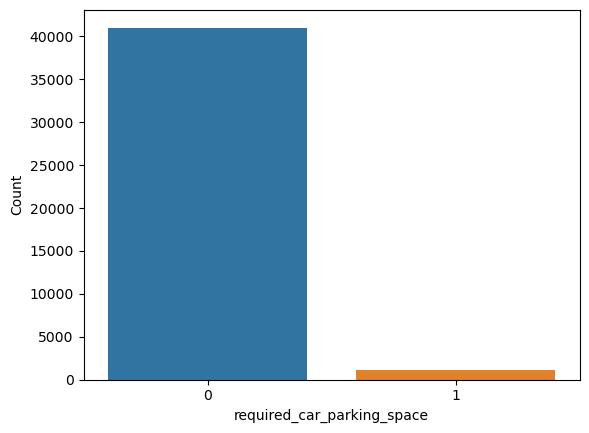

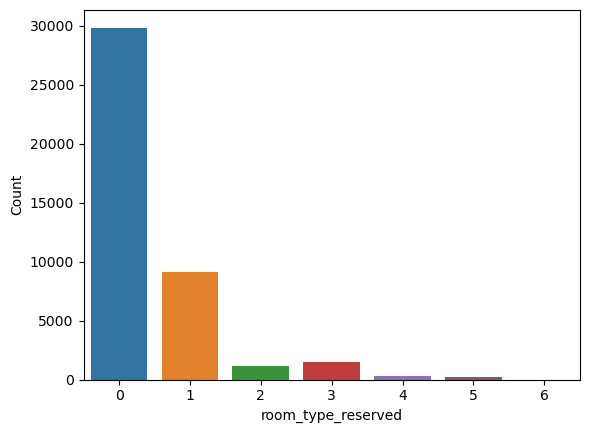

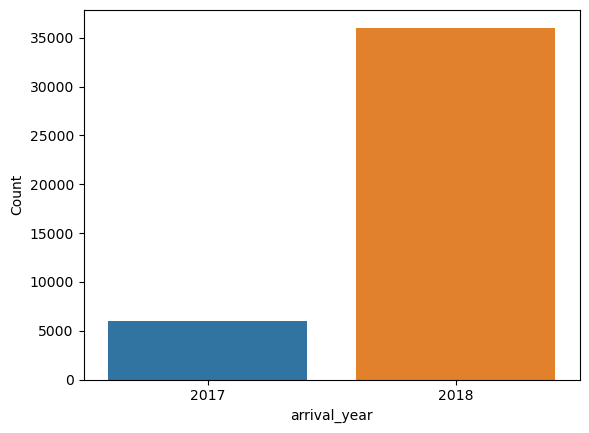

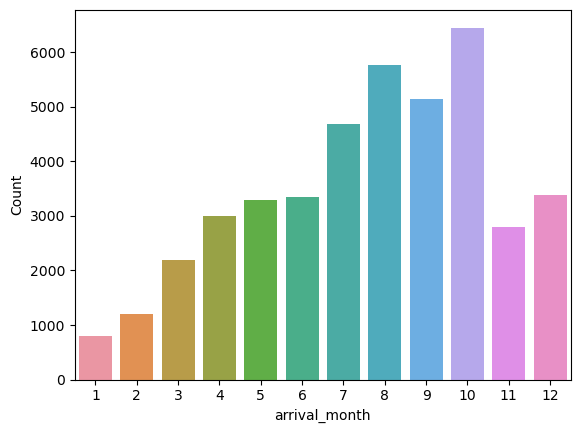

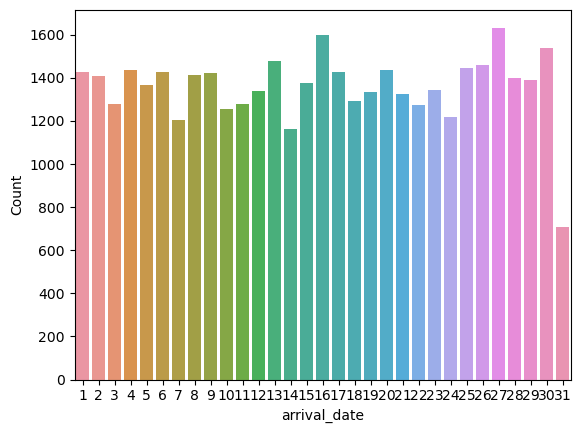

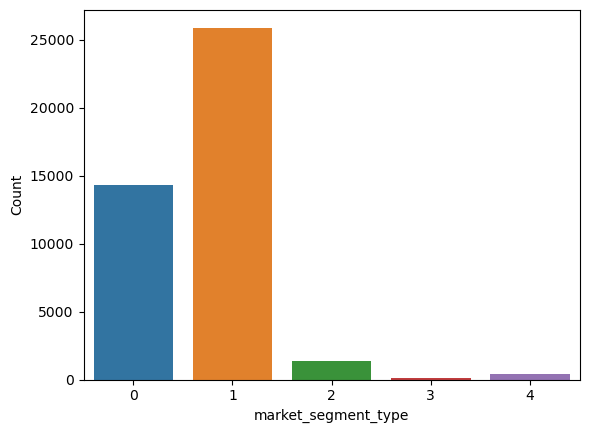

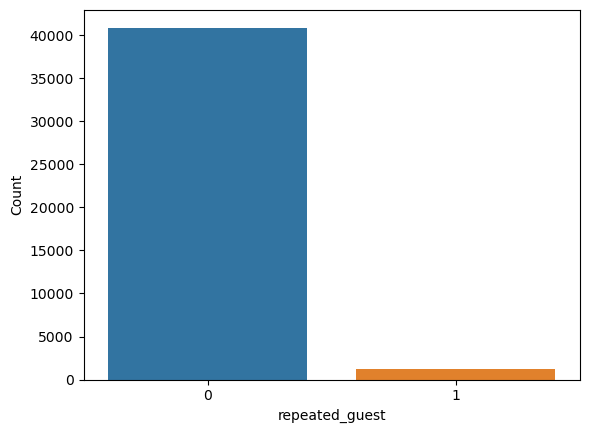

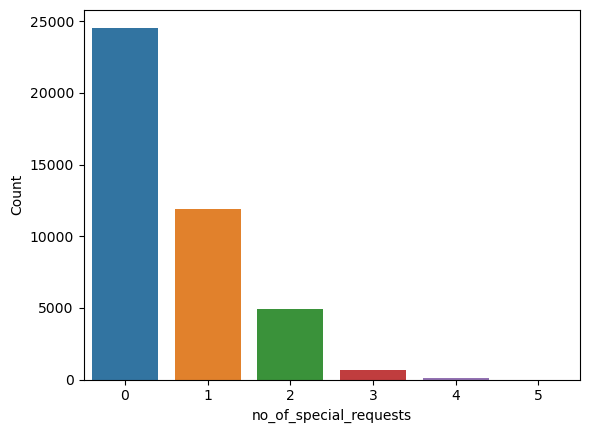

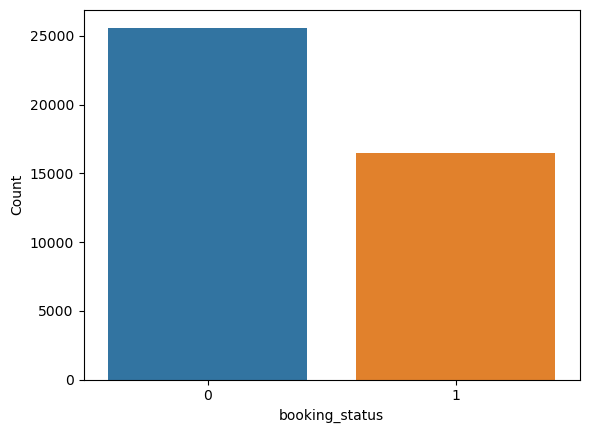

In [9]:
#Explore categorical features
cat_features = cat_selector(train_data)
print(cat_features)
for feature in cat_features:
    sns.countplot(x=feature,data=train_data)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

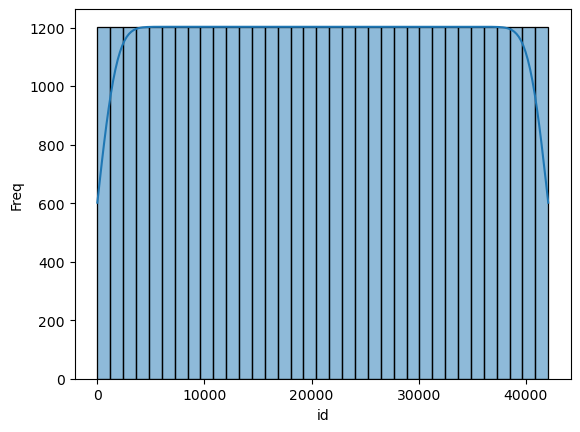

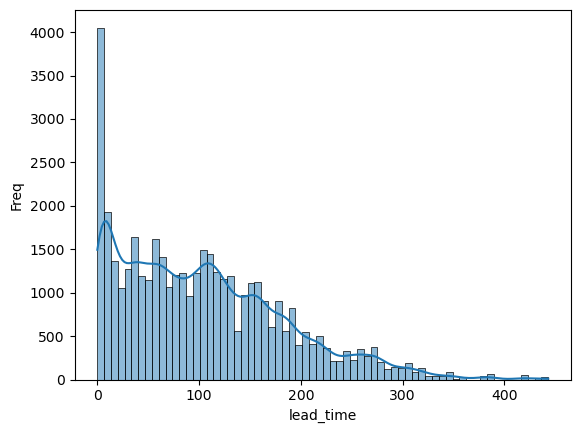

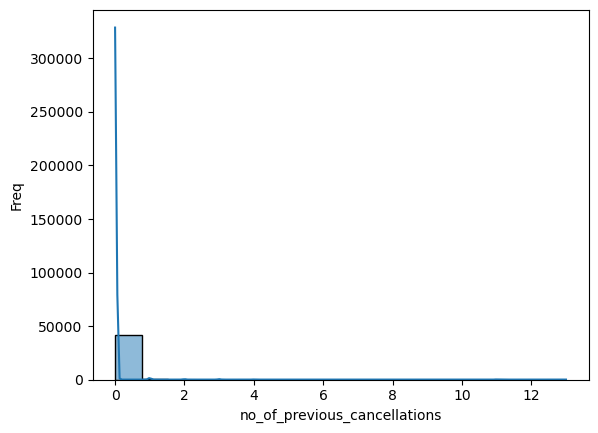

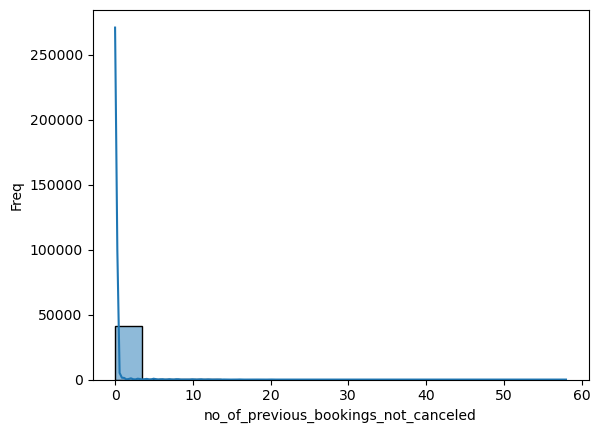

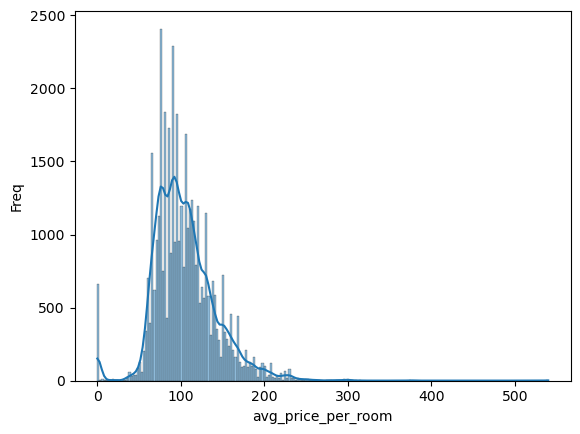

In [10]:
cont_dist_features = [ feature for feature in cont_selector(train_data)]
for feature in cont_dist_features:
    sns.histplot(train_data[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel('Freq')
    plt.show()

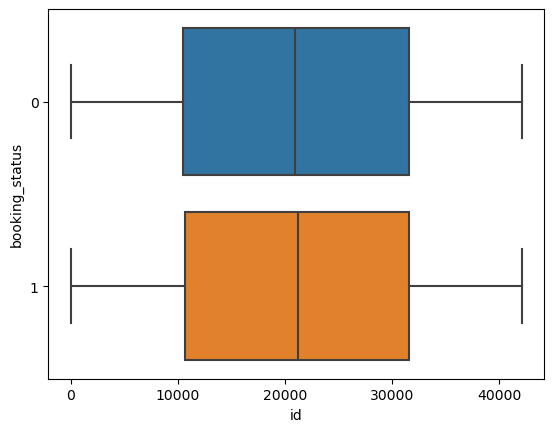

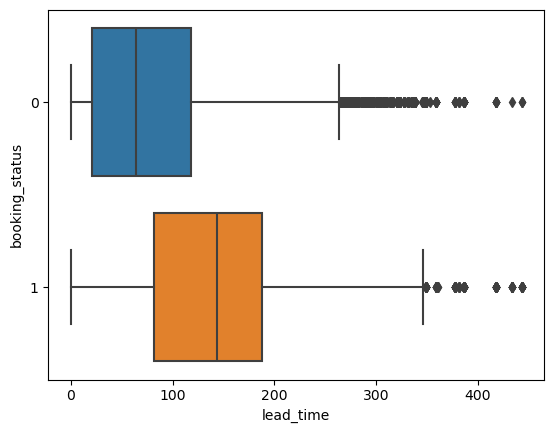

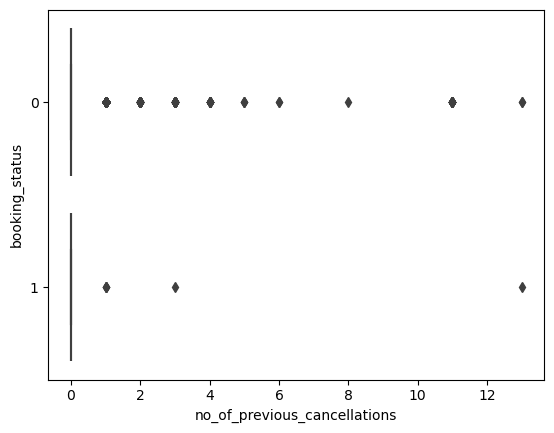

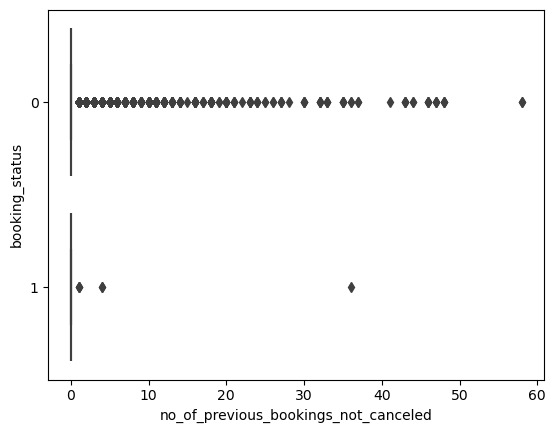

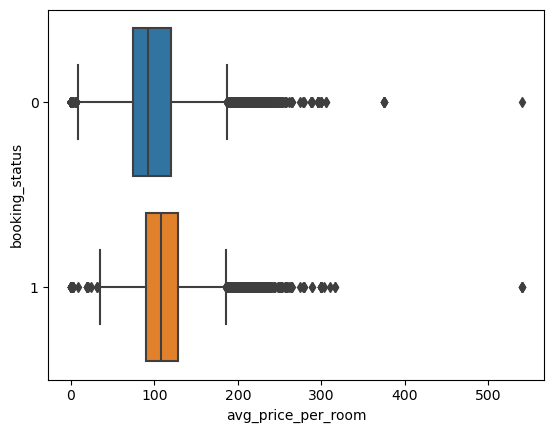

In [29]:
#Explore categorical features vs target relationships
for feature in cont_dist_features:
    sns.boxplot(x=feature, y='booking_status', data=train_data)
    plt.xlabel(feature)
    plt.ylabel('booking_status')
    plt.show()